# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



1. Inisiasi jumlah kluster secara random. K adalah sebuah parameter yang mewakilkan angka dari cluster yang data points nya akan dilakukan pengelompokan.
2. Tentukan posisi centroid secara random.
3. Hitung jarak antara data point ke centroid. Assign setiap data ke centroid terdekat (hal ini akan membentuk  k clusters).Perhitungan jarak antara titik data ke centroid menggunakan formula euclidean distance.
4. Kemudian hitung ulang centroid berdasarkan label-label data sebelumnya. Disini kita buat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid.
5. Kemudian di assign kembali data poin ke centroid terdekat yang terbaru, dan kita cek apakah ada perubahan dalam cluster atau tidak, jika ada maka kita perlu kembali ke poin 4 mencari posisi centroid yang tidak mengubah cluster. Hal ini kita lakukan perulangan sampai posisi centroid tidak berubah lagi. 

---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [2]:
#code here
df1=df.fillna(method='ffill')
def remove_outlier(x):
    q1=df1.quantile(0.25)
    q3=df1.quantile(0.75)
    iqr=q3-q1
    df_final=df1[~((df1<(q1-(1.5*iqr))) | (df1>(q3+(1.5*iqr))))]
    return df_final

<AxesSubplot:xlabel='Umur'>

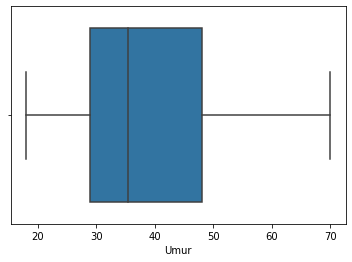

In [5]:
df2 = remove_outlier(df[['Umur', 'Skor Belanja (1-100)']])
df2.dropna(axis=0, inplace=True)
sns.boxplot(x='Umur',data=df2)

<AxesSubplot:xlabel='Skor Belanja (1-100)'>

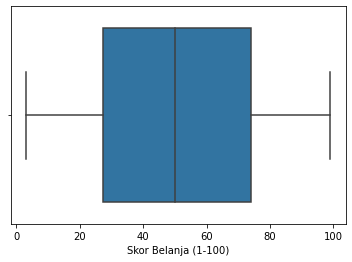

In [6]:
sns.boxplot(x='Skor Belanja (1-100)',data=df2)

In [7]:
from sklearn.preprocessing import StandardScaler
df3=df2[['Umur','Skor Belanja (1-100)']]
df3

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
244,27.0,69.0
245,59.0,14.0
246,35.0,90.0
247,37.0,32.0


In [8]:
sc = StandardScaler()
df_std = sc.fit_transform(df3)
df_std

array([[-1.45540807e+00, -3.96862497e-01],
       [-1.30503831e+00,  1.12123573e+00],
       [-1.38022319e+00, -1.58965396e+00],
       [-1.15466856e+00,  9.76654949e-01],
       [-5.53189542e-01, -3.60717301e-01],
       [-1.22985343e+00,  9.40509753e-01],
       [-2.52450034e-01, -1.58965396e+00],
       [-1.15466856e+00,  1.59112328e+00],
       [ 1.92791140e+00, -1.69808955e+00],
       [-6.28374419e-01,  7.95928969e-01],
       [ 2.15346603e+00, -1.30049240e+00],
       [-2.52450034e-01,  1.77184926e+00],
       [ 1.47680214e+00, -1.26434720e+00],
       [-1.07948368e+00,  9.76654949e-01],
       [-1.02080280e-01, -1.33663759e+00],
       [-1.22985343e+00,  1.04894534e+00],
       [-1.38022319e+00,  5.79057793e-01],
       [ 1.02569287e+00, -7.58314456e-01],
       [-2.52450034e-01,  1.73570406e+00],
       [-2.52450034e-01, -5.41443281e-01],
       [-1.00429880e+00,  8.32074165e-01],
       [ 5.74583613e-01, -1.62579916e+00],
       [-5.53189542e-01,  8.32074165e-01],
       [ 1.

In [9]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1
kmeans1

KMeans(n_clusters=2, random_state=42)

In [10]:
new_df = pd.DataFrame(data=df_std, columns=['Umur', 'Skor Belanja (1-100)'])
new_df['label1_kmeans'] = labels1
new_df

,Umur,Skor Belanja (1-100),label1_kmeans
0,-1.455408,-0.396862,0
1,-1.305038,1.121236,0
2,-1.380223,-1.589654,1
3,-1.154669,0.976655,0
4,-0.553190,-0.360717,0
...,...,...,...
241,-0.853929,0.687493,0
242,1.551987,-1.300492,1
243,-0.252450,1.446542,0
244,-0.102080,-0.649879,1


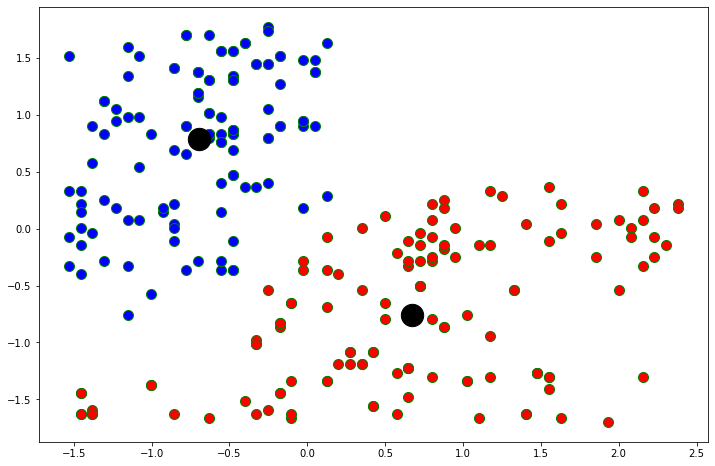

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

plt.scatter(new_df['Umur'][new_df.label1_kmeans == 0], new_df['Skor Belanja (1-100)'][new_df.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df['Umur'][new_df.label1_kmeans == 1], new_df['Skor Belanja (1-100)'][new_df.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=500 )

plt.show()

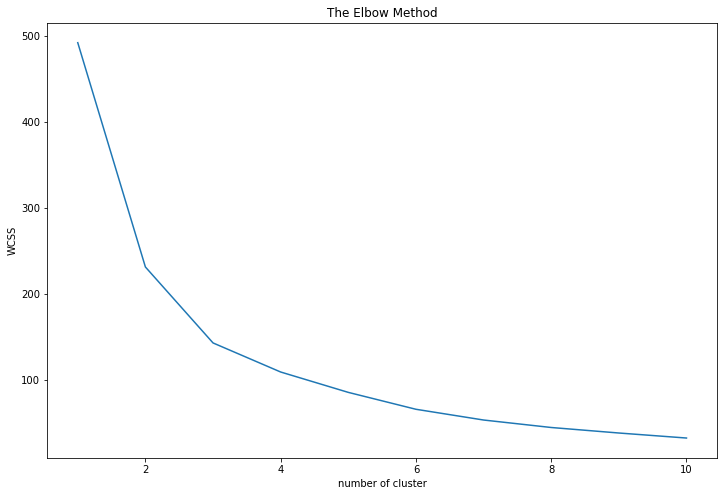

In [12]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')

plt.show()

In [13]:
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std)
labels2 = kmeans2.labels_
labels2

array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1,
       2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 2, 0])

In [14]:
new_df['label2_kmeans'] = labels2
new_df

,Umur,Skor Belanja (1-100),label1_kmeans,label2_kmeans
0,-1.455408,-0.396862,0,2
1,-1.305038,1.121236,0,0
2,-1.380223,-1.589654,1,2
3,-1.154669,0.976655,0,0
4,-0.553190,-0.360717,0,2
...,...,...,...,...
241,-0.853929,0.687493,0,0
242,1.551987,-1.300492,1,1
243,-0.252450,1.446542,0,0
244,-0.102080,-0.649879,1,2


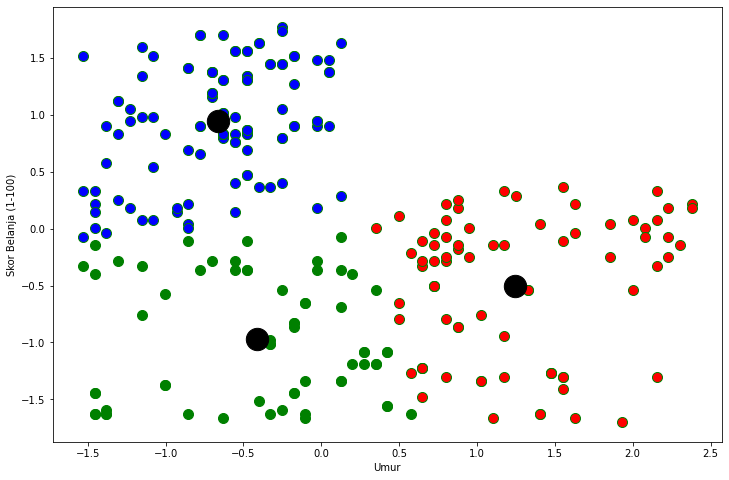

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(new_df['Umur'][new_df.label2_kmeans == 0], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df['Umur'][new_df.label2_kmeans == 1], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(new_df['Umur'][new_df.label2_kmeans == 2], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans == 2], c='green', s=100, edgecolor='green')
plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='k', s=500 )
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df_std, labels=labels1))
print(silhouette_score(df_std, labels=labels2))

0.48547668843696046
0.46322118979522214


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:
Dari Scatter plot dengan 3 cluster, dapat dilihat bahwa:
-cluster berwarna hijau, yaitu pelanggan dengan umur lebih muda, sebagian cenderung memberikan skor belanja yang rendah.
-cluster berwarna biru, yaitu pelanggan dengan umur lebih muda sebagian juga memberikan skor belanja yang sangat tinggi.
-cluster berwarna merah, yaitu pelanggan dengan umur lebih tua, secara keseluruhan memberikan skor belanja sangat rendah.

Kenapa hal ini terjadi? ada beberapa faktor yang mungkin perlu diperhatikan:
-pelanggan dengan usia lebih tua memiliki kesulitan mencari barang belanja yang ingin dicari, penyebabnya bisa jadi letak barang khusus usia tua tidak strategis, tidak adanya bangku duduk atau rest area, kemudian letak barang yang ingin dibeli terlalu tinggi, kurangnya staff jaga sebagai penunjuk letak barang, atau bisa juga tempat yang terlalu luas sehingga mereka mengeluh akan jauhnya letak barang tersebut, dan beberapa hal lainnya.

-sebagian pelanggan dengan usia muda mungkin memiliki masalah terhadap pelayanan, seperti kurang ramahnya staff terhadap pelanggan yang datang dan bertanya. Hal lainnya yaitu tidak adanya rest area atau tempat duduk untuk mereka menikmati barang yang dibeli, seperti tempat duduk di pelataran toko.

Saran yang dapat diberikan untuk supermarket ini adalah:
1. Sediakan rest area atau temapt duduk untuk pelanggan
2. Perbanyak staff sehingga pelanggan tidak kesusahan mencari barang yang diinginkan
3. Tempatkan barang-barang kebutuhan primer di tempat yang strategis dan mudah ditemukan
4. Selalu memberikan pelayanan terbaik terhadap semua pelanggan
5. Adakan promo diskon beberapa minggu atau bulan sekali, guna menarik pelanggan lebih banyak lagi